In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_table(r"E:\01-grasspython-2022\data science\machine learning\day-4 decision tree\fruit_data_with_colors.txt")

In [5]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [7]:
df.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [8]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [9]:
mask = df['fruit_name'] == 'lemon'

In [10]:
mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
Name: fruit_name, dtype: bool

In [11]:
df[mask]['color_score'].describe()

count    16.000000
mean      0.718125
std       0.010468
min       0.700000
25%       0.710000
50%       0.720000
75%       0.720000
max       0.740000
Name: color_score, dtype: float64

In [12]:
import seaborn as sns

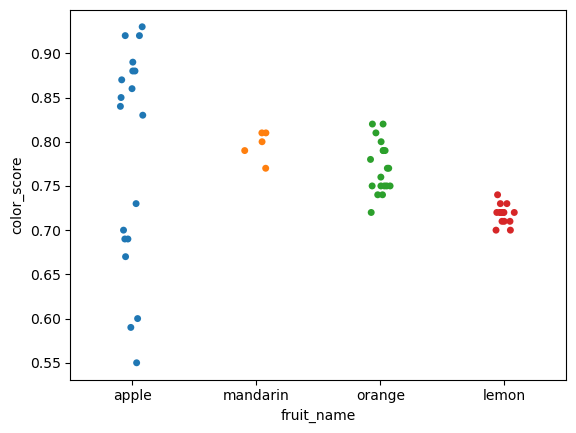

In [13]:
sns.stripplot(x='fruit_name', y ='color_score', data=df);

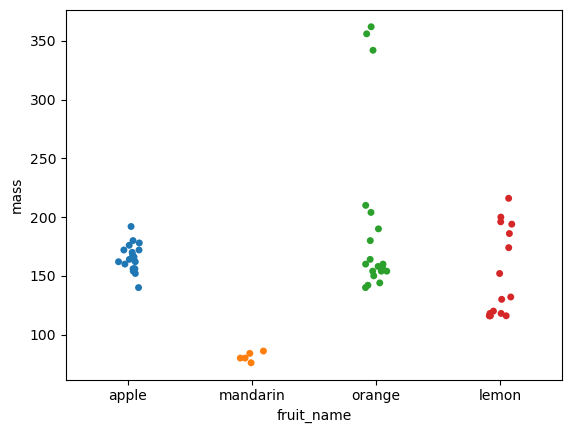

In [14]:

sns.stripplot(x='fruit_name', y ='mass', data=df);

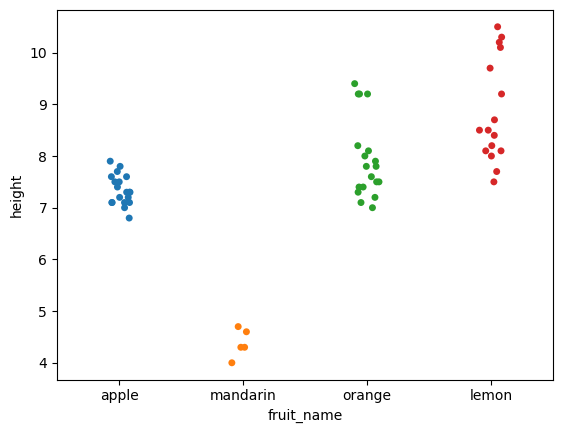

In [15]:
sns.stripplot(x='fruit_name', y ='height', data=df);

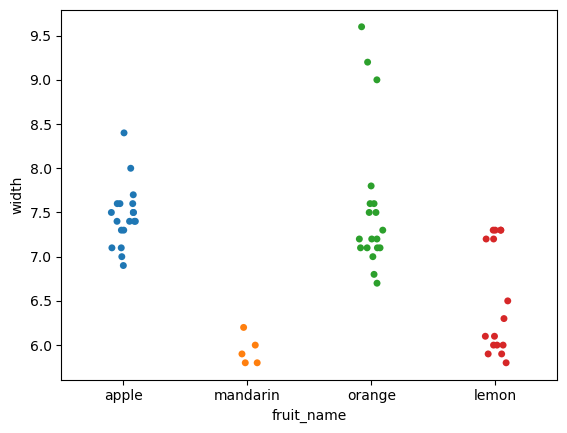

In [16]:
sns.stripplot(x='fruit_name', y ='width', data=df);

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
cols = ['width','height','color_score']

In [19]:
X = df.loc[:,cols].values

print(X.shape)

(59, 3)


In [20]:
y = df.iloc[:,0].values
print(y.shape)

(59,)


In [21]:
#Standardising the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X

array([[ 1.59869024, -0.29139659, -2.79359541],
       [ 1.10485399, -0.66192242, -2.26868417],
       [ 0.36409961, -0.36550175, -2.13745636],
       [-1.11740915, -2.21813091,  0.48709984],
       [-1.36432727, -2.29223608,  0.35587203],
       [-1.6112454 , -2.51455158,  0.09341641],
       [-1.48778634, -2.51455158,  0.61832765],
       [-1.6112454 , -2.73686708,  0.61832765],
       [-0.00627758,  0.07912925,  2.06183356],
       [ 0.36409961, -0.51371209,  1.66815013],
       [-0.25319571, -0.29139659,  2.19306137],
       [-0.00627758, -0.06908109,  2.06183356],
       [-0.12973664, -0.43960692,  1.53692232],
       [ 0.24064055,  0.00502408, -0.82517826],
       [ 0.61101774, -0.29139659, -0.95640607],
       [ 0.7344768 , -0.43960692, -0.95640607],
       [ 0.61101774, -0.14318625, -1.21886169],
       [ 0.48755867, -0.06908109, -0.43149483],
       [ 0.48755867, -0.43960692,  0.88078327],
       [ 0.36409961, -0.36550175,  1.14323889],
       [ 0.48755867, -0.14318625,  1.274

In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 123)

In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8333333333333334

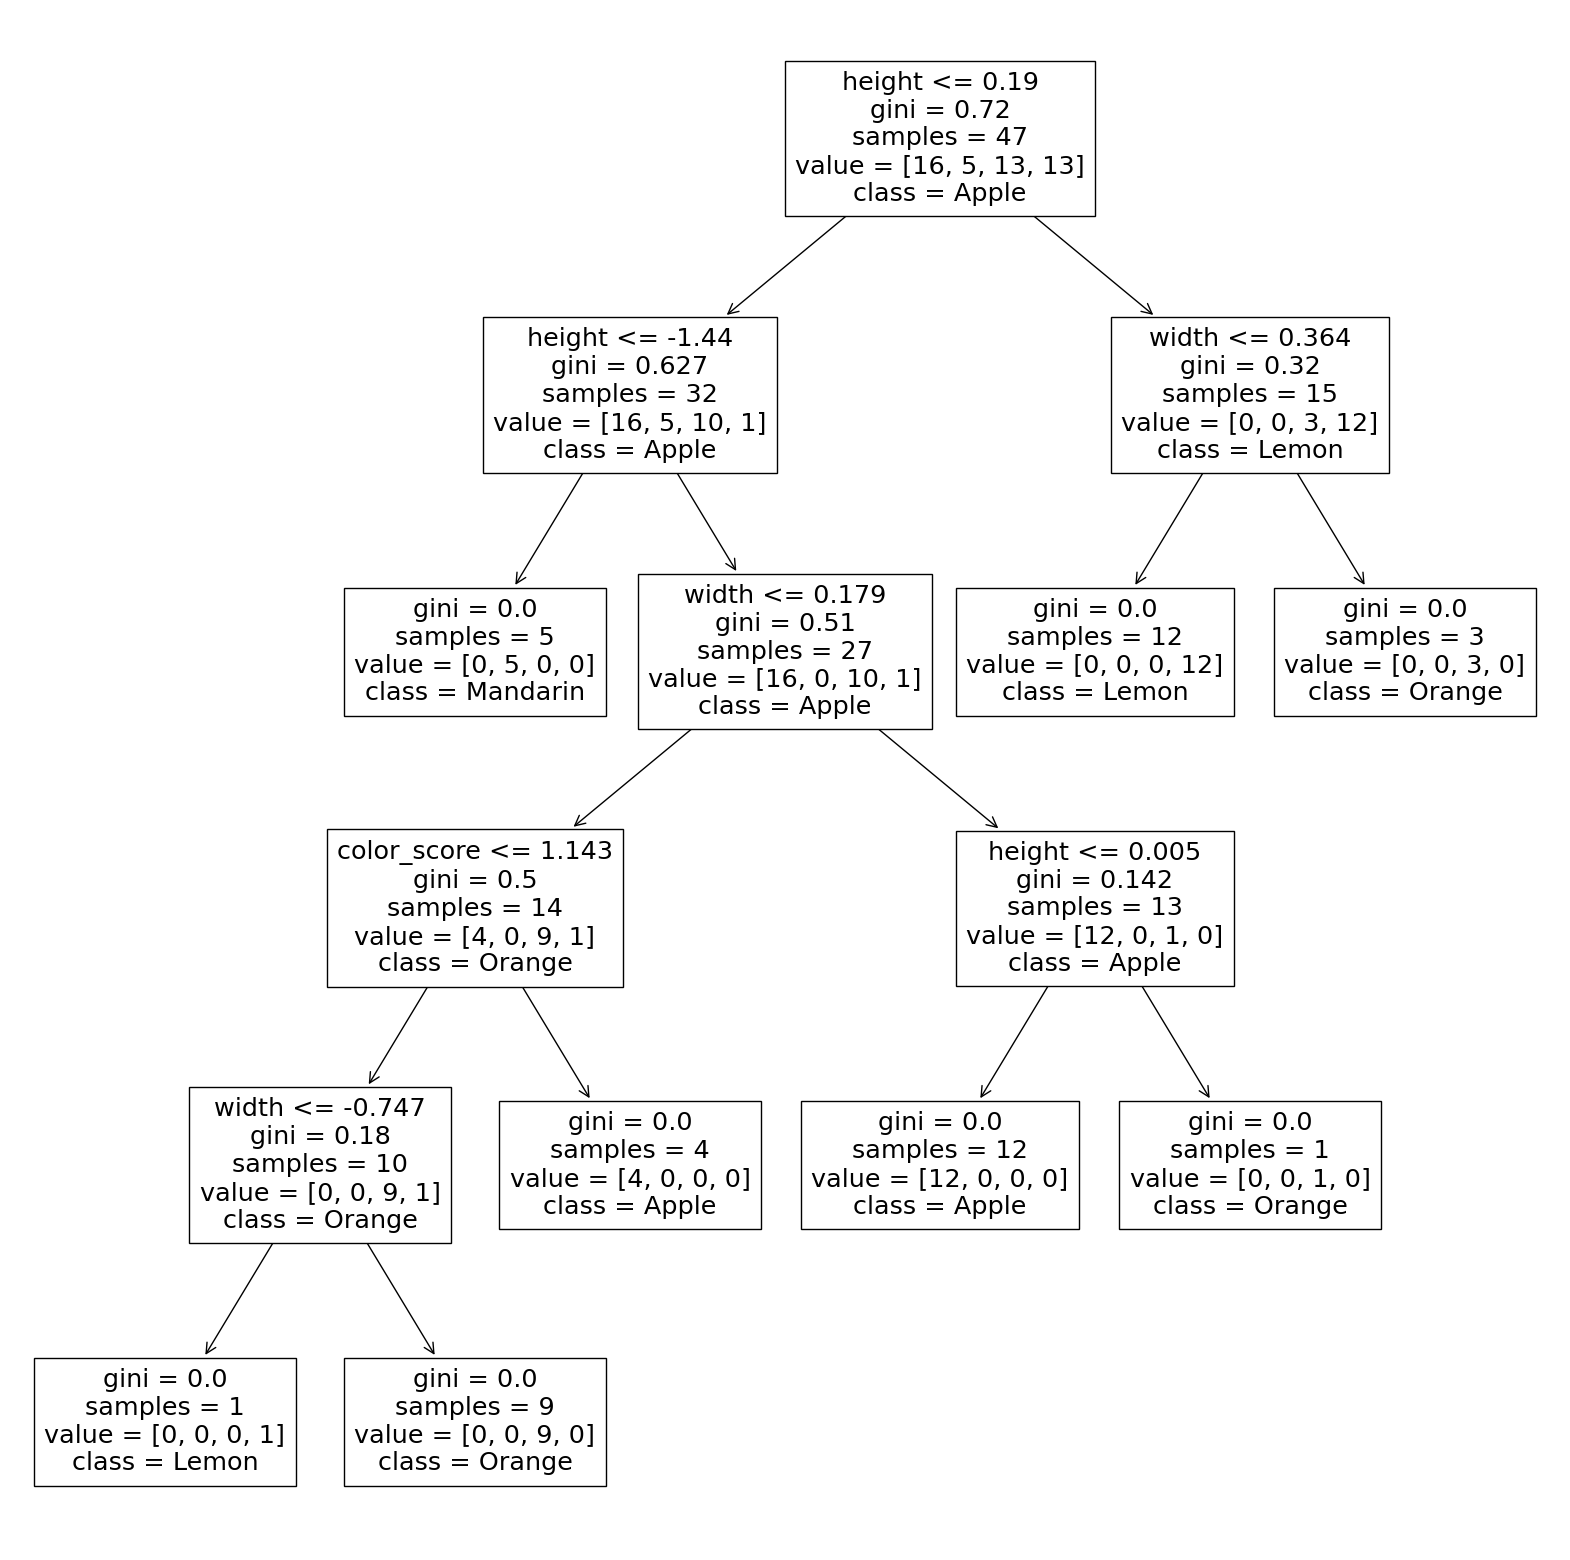

In [25]:
import sklearn.tree as tree

fig=plt.figure(figsize=(20,20))
tree.plot_tree(classifier,
              feature_names = cols,
              class_names = ['Apple', 'Mandarin','Orange','Lemon']);

In [26]:

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=7)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

In [29]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [2,5,10,50]
grid['criterion'] = ['gini', 'entropy']
grid['max_depth'] = [3,5,7]


In [30]:
tunedClassifier = RandomForestClassifier()
rf_tuned = GridSearchCV(tunedClassifier, grid)
rf_tuned.fit(X_train, y_train)
rf_tuned.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}

In [31]:
classifier = RandomForestClassifier(n_estimators=10, max_depth=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

In [32]:

from sklearn.model_selection import cross_val_score

results = cross_val_score(classifier, X_train, y_train, cv=5)

print(f"Average Accuracy: {round(results.mean(),2)} with +/-: {round(results.std(),2)}")


print("Average Accuracy: ", round(results.mean(),2), "with +/-: ", round(results.std(),2))


Average Accuracy: 0.96 with +/-: 0.05
Average Accuracy:  0.96 with +/-:  0.05


In [33]:
from sklearn.metrics import classification_report, plot_confusion_matrix

X_test.shape

y_test


array([4, 3, 1, 4, 3, 3, 4, 3, 1, 1, 3, 3], dtype=int64)

In [34]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



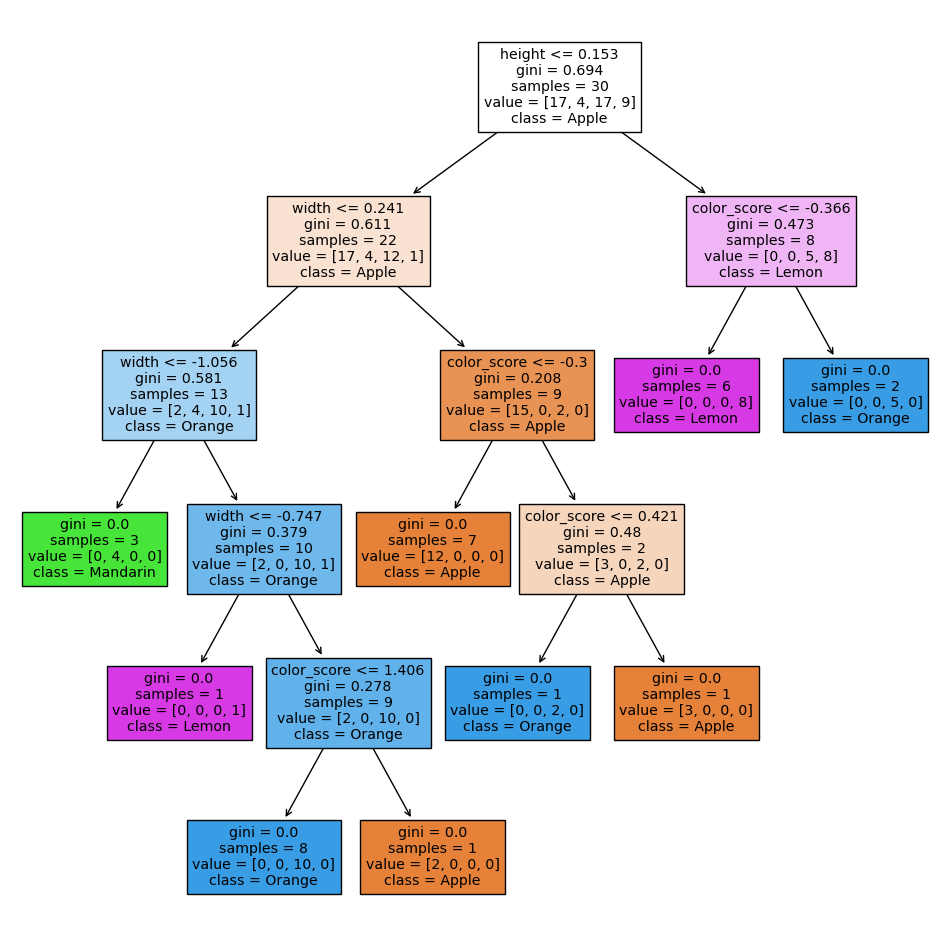

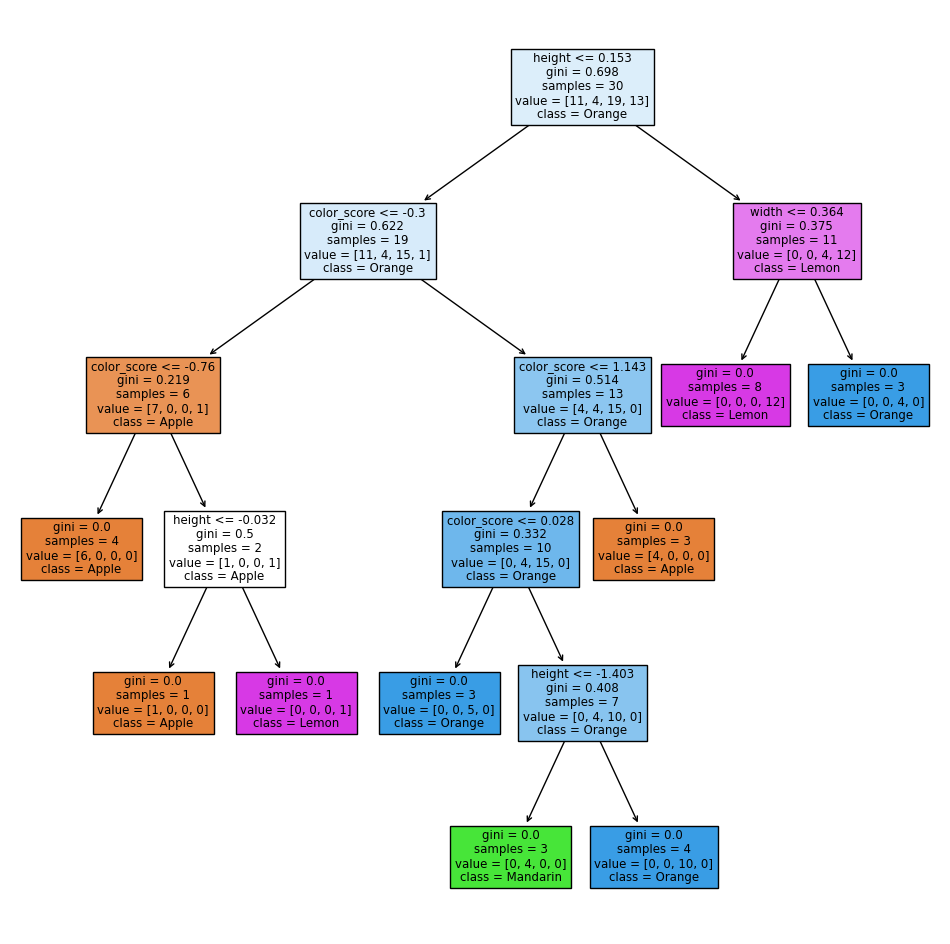

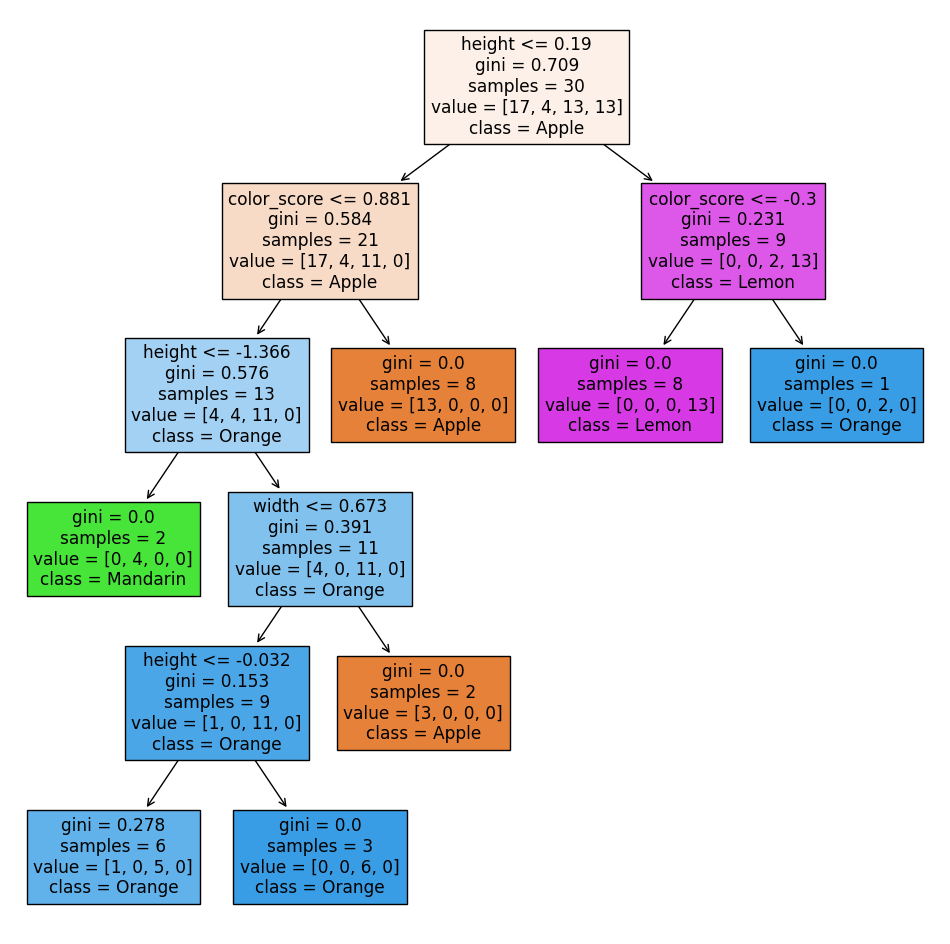

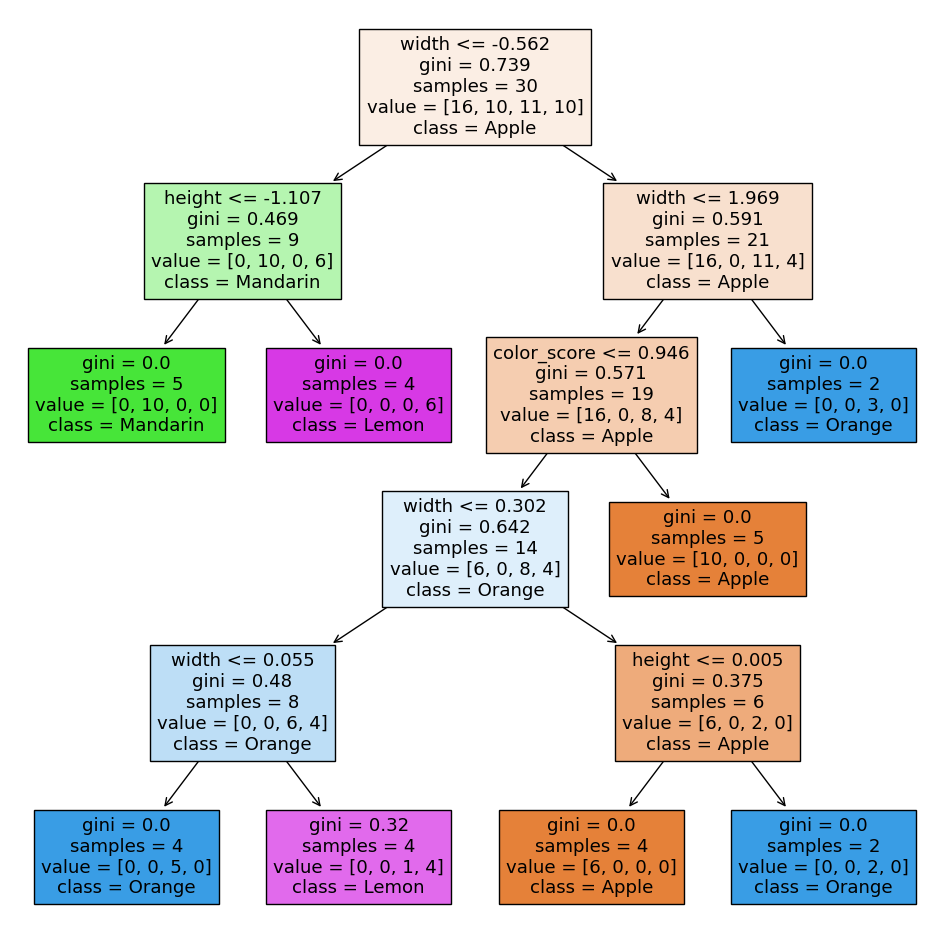

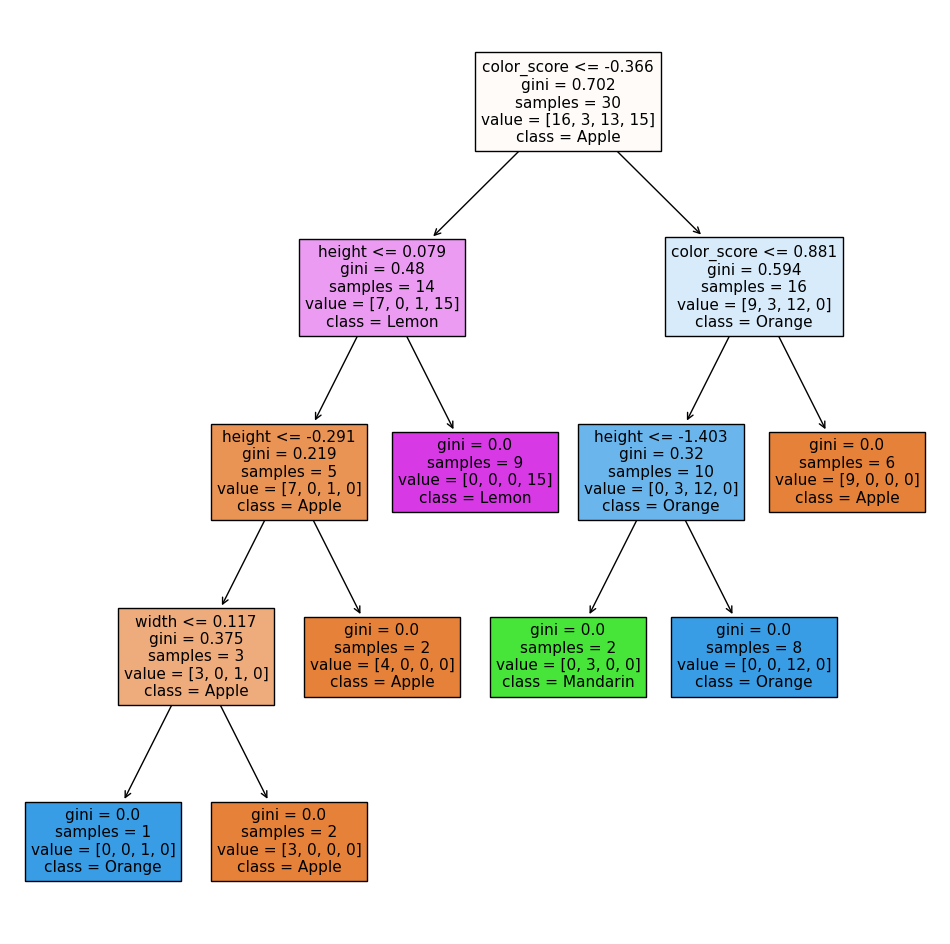

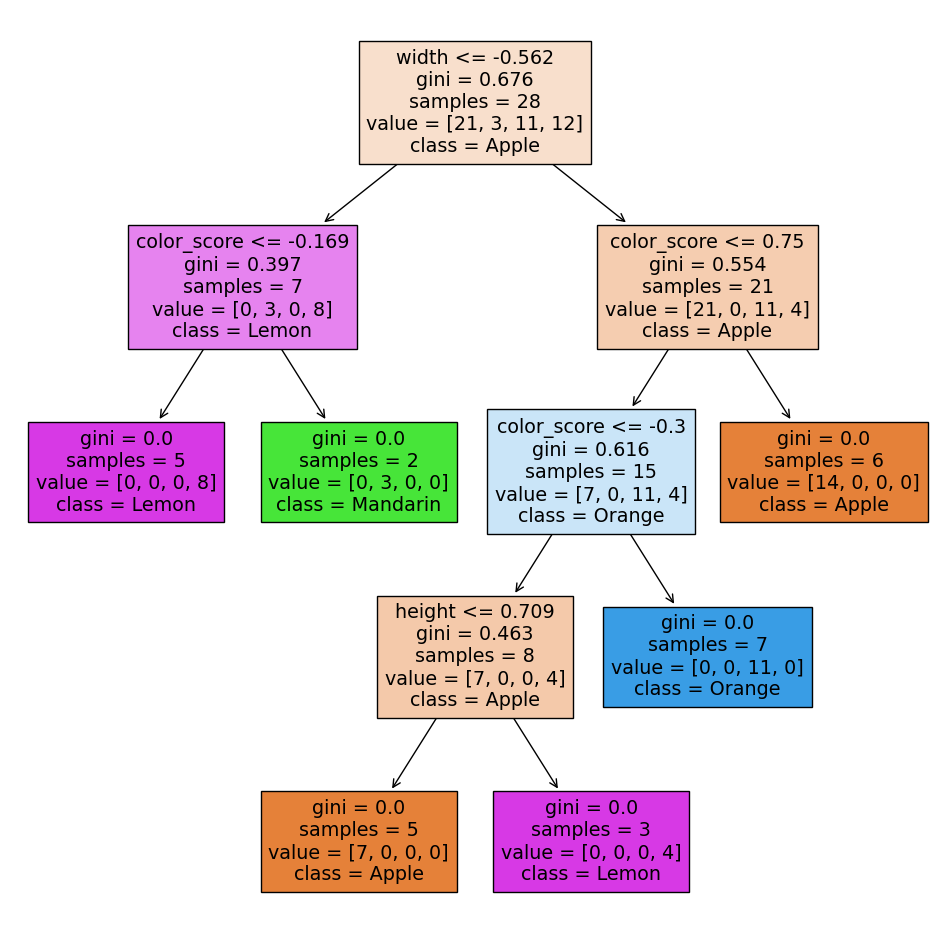

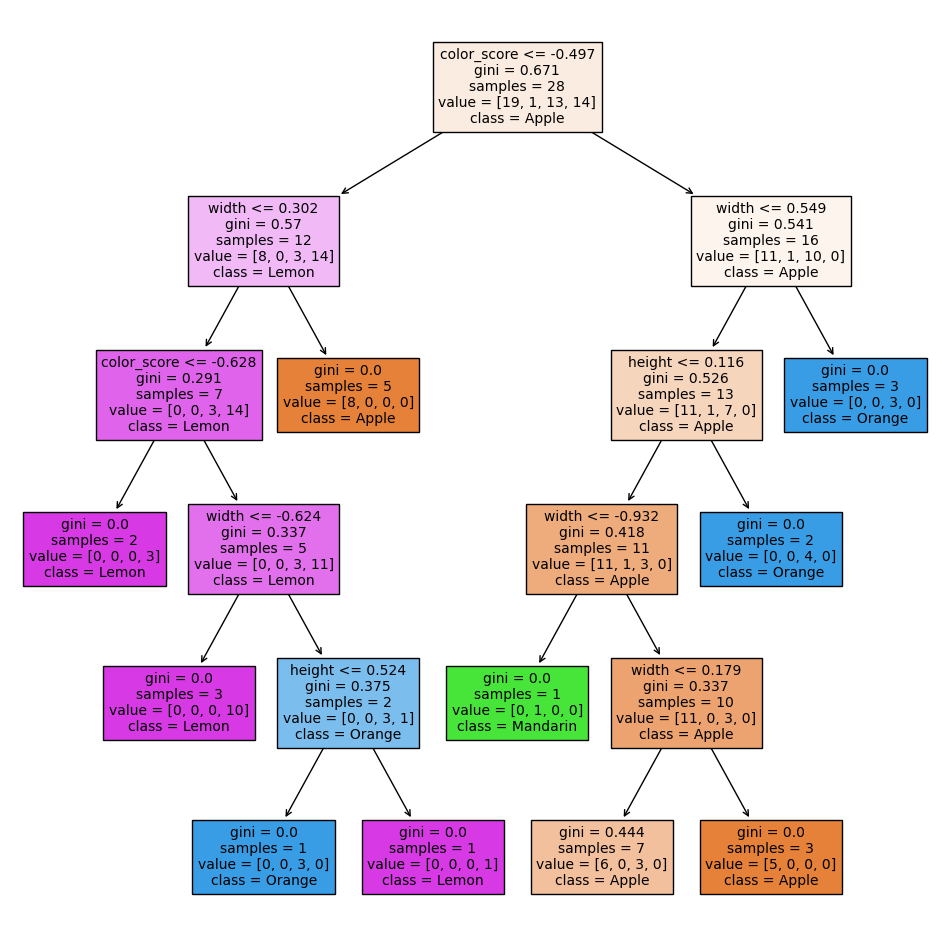

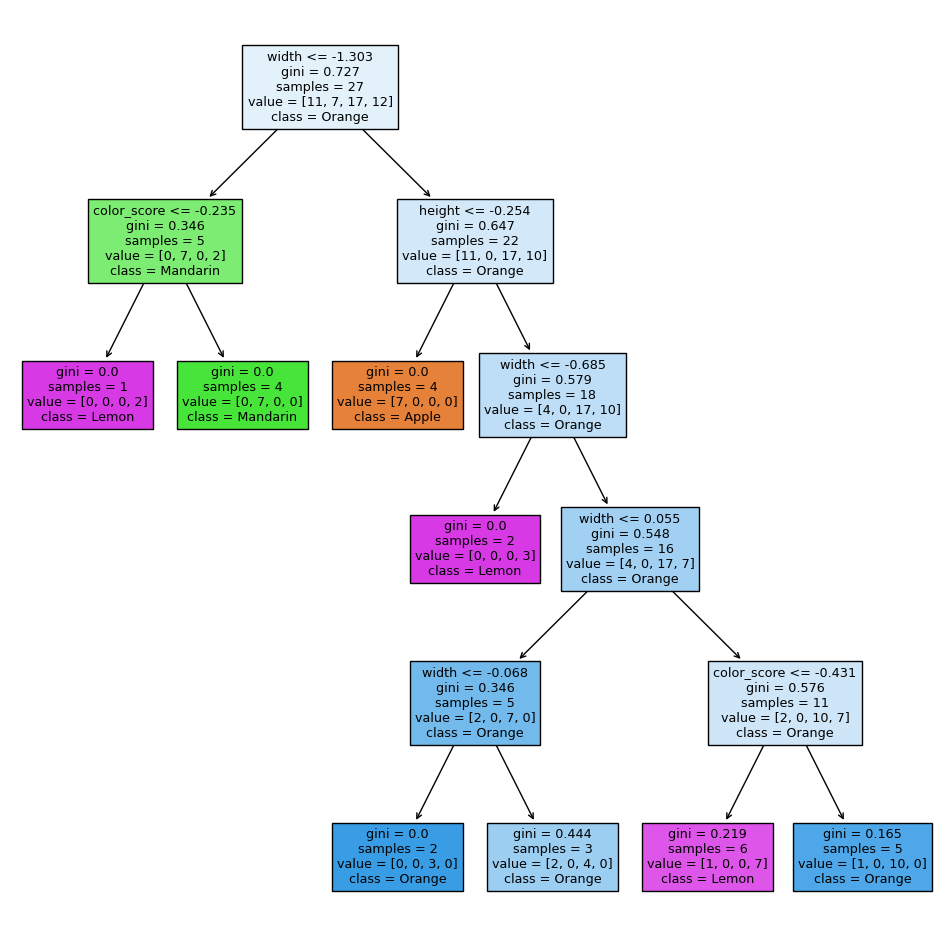

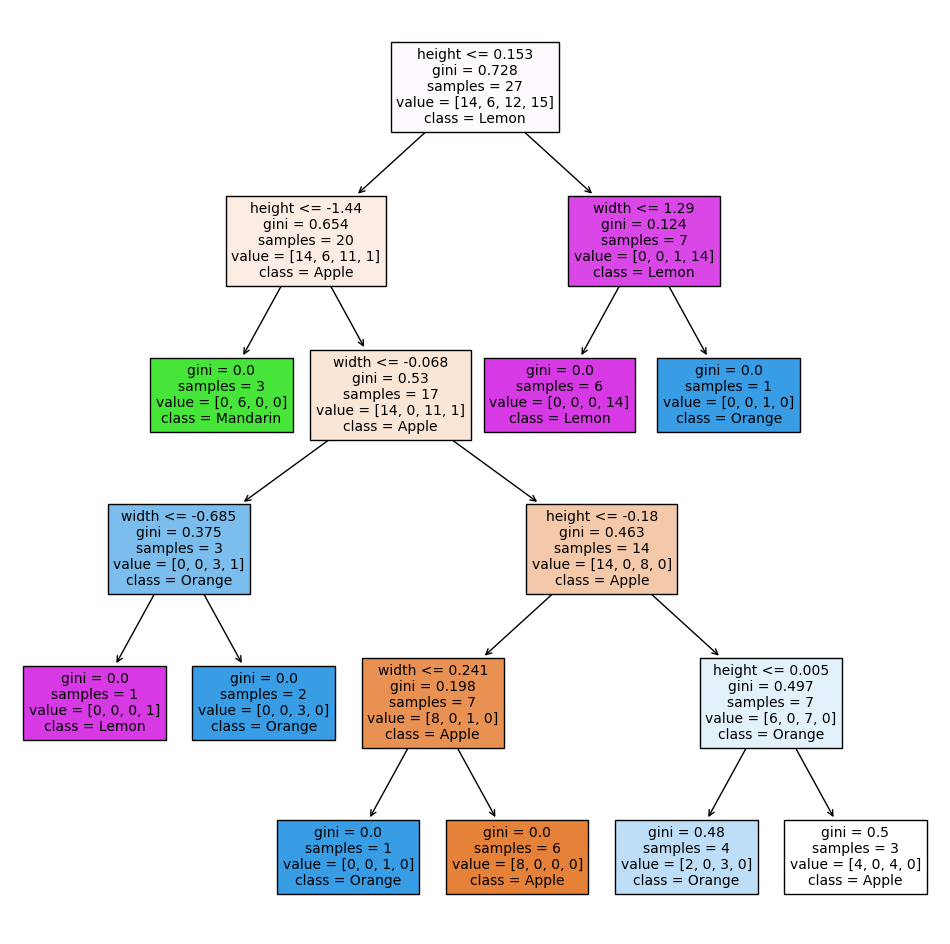

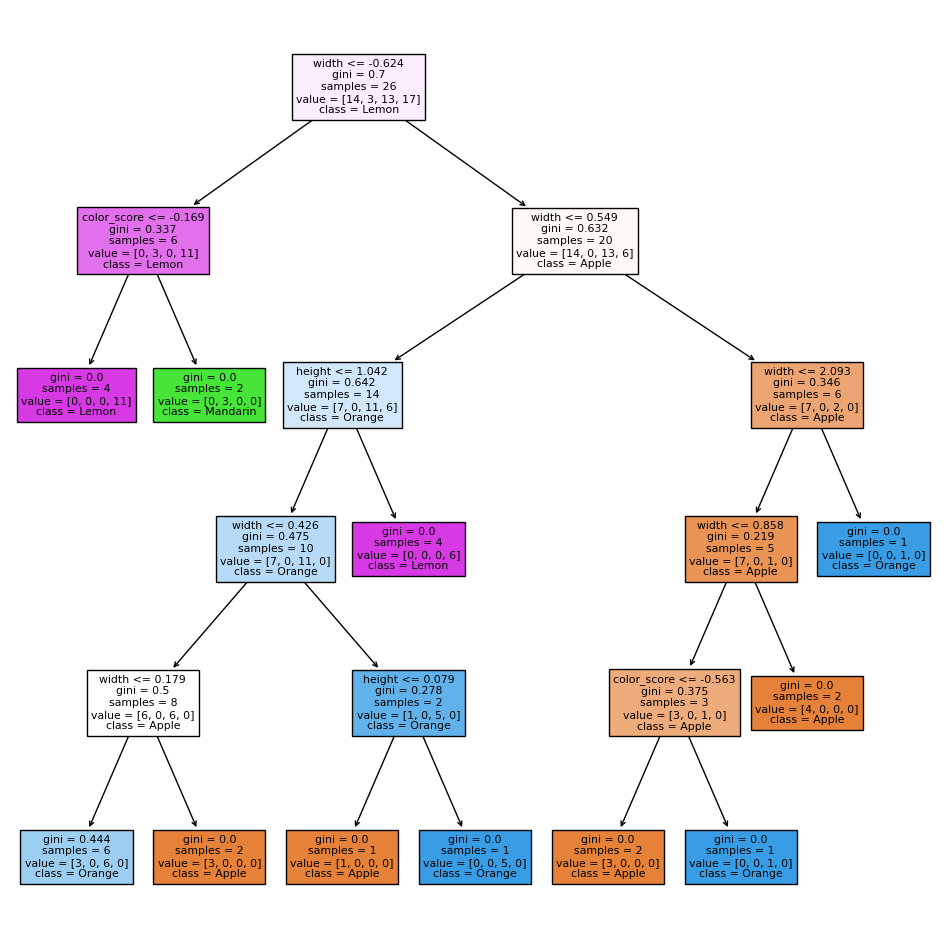

In [35]:
for i in range(10):
    fig, axes = plt.subplots(figsize=(12,12))
    tree.plot_tree(classifier.estimators_[i],
                  feature_names = cols,
                  class_names = ['Apple', 'Mandarin','Orange','Lemon'],
                   filled = True,
                  ax = axes)


In [36]:
classifier.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=645625757),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=3685309),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=427987997),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1118925344),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1450345461),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1200628265),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1258944786),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=2021439097),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=659212525),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1851362037)]

In [37]:
classifier.feature_importances_

array([0.33084712, 0.35026739, 0.31888549])

In [38]:
classifier.n_features_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3

In [39]:
newdata = [5.8,4.8,0.78]
classifier.predict([newdata])

newdata = [7.2,9.2,0.77]
classifier.predict([newdata])

array([3], dtype=int64)